In [1]:
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

In [1]:
from pydataset import data
import pandas as pd

In [11]:
# import data

In [3]:
iris = data('iris')

In [10]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [12]:
# group the data

In [113]:
iris_grp=iris.sample(125).groupby('Species').agg({'Sepal.Length':['mean','count']})
iris_grp.columns = ['_'.join(c) for c in iris_grp.columns]
iris_grp.reset_index(inplace=True)


In [114]:
iris_grp

,Species,Sepal.Length_mean,Sepal.Length_count
0,setosa,5.054286,35
1,versicolor,5.892683,41
2,virginica,6.581633,49


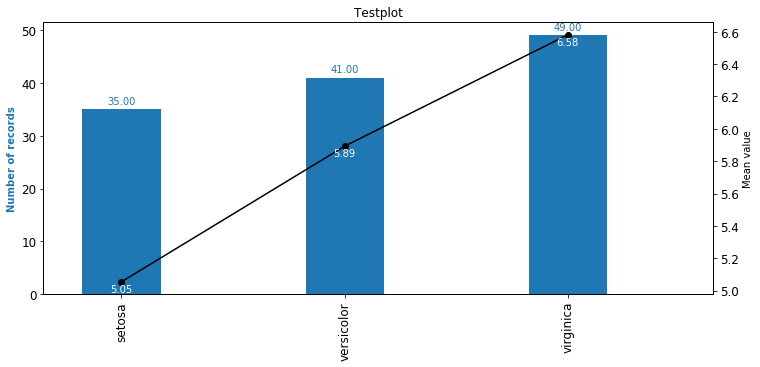

In [115]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
    
fig, ax = plt.subplots()

width=.35
xs=iris_grp.index
ys=iris_grp['Sepal.Length_count']

ys.plot(kind='bar',color='#1f77b4', width = width, ax=ax,fontsize=12)
plt.ylabel('Number of records', color='#1f77b4', fontweight='bold')
#[ax.text(i, v+1, '{:.0f}'.format(v),color='#1f77b4') for i, v in enumerate(list(iris_grp['Sepal.Length_count']))];
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='#1f77b4')

ax2=ax.twinx()
xs=iris_grp.index
ys=iris_grp['Sepal.Length_mean']

ys.plot(secondary_y=True, color='black', marker='o', ax=ax2,fontsize=12)
plt.ylabel('Mean value')
#[ax2.text(i, v*0.1, '{:.2f}'.format(v)) for i, v in enumerate(list(iris_grp['Sepal.Length_mean']))];

for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='w')


ax = plt.gca()
plt.xlim([-width, len(iris_grp['Sepal.Length_mean'])-width])

labels=[m for m in iris_grp.Species]
ax.set_xticklabels(labels)
plt.title('Testplot')

plt.show()
